# Homework Assignment 1
### [The Art of Analyzing Big Data - The Data Scientist’s Toolbox](https://www.ise.bgu.ac.il/labs/fire/lectures.html)
#### By Dr. Michael Fire 

For this homework you will need to write code that analyzes real-world datasets. The code needs to be written in Python using the [sqlite3](https://docs.python.org/2/library/sqlite3.html) package. 

**Please note:** You need to answer only the questions that match your ID first digit.

# 1. Babies Names Dataset (35pt)

**Task 1 (for everyone):** Write a code that uses the  [**babies names dataset**](https://catalog.data.gov/dataset/baby-names-from-social-security-card-applications-data-by-state-and-district-of-#topic=developers_navigation) and creates a table named (Names) with the dataset data and the following columns: 'State', 'Gender', 'Name', 'Number', and 'Year' (5pt)
**Bonus:** Load the data using a Batch INSERT SQL Query (2pt)

In [1]:
!wget "https://www.ssa.gov/oact/babynames/state/namesbystate.zip"
!mkdir ./datasets
!mkdir ./datasets/babies_names
!unzip namesbystate.zip -d ./datasets/babies_names

babies_names_path = './datasets/babies_names'
sql_create_names_table = """ CREATE TABLE IF NOT EXISTS Names (
                                        State text,
                                        Gender text,
                                        Year integer,
                                        Name text,
                                        Number integer
                                    ); """
state_index, gender_index, year_index, name_index, number_index = range(0,5)

import os
import sqlite3

conn = sqlite3.connect(f'{babies_names_path}/database.sqlite') # connecting to the database
c = conn.cursor() # creating a cursor object
c.execute(sql_create_names_table)

names_table_rows = []
for filename in os.listdir(babies_names_path):
   if filename.endswith(".TXT"): 
    with open(os.path.join(babies_names_path, filename)) as f:
      for line in f:
        line_details = line.split(',')
        state = line_details[state_index]
        gender = line_details[gender_index]
        year = int(line_details[year_index])
        name = line_details[name_index]
        number = int(line_details[number_index])
        names_table_rows.append([state, gender, year, name, number])
c.executemany('insert into Names values (?,?,?,?,?)', names_table_rows)
conn.commit()   
c.close() # close the cursor

--2020-03-29 16:17:16--  https://www.ssa.gov/oact/babynames/state/namesbystate.zip
Resolving www.ssa.gov (www.ssa.gov)... 137.200.39.19, 2001:1930:d07::aaaa
Connecting to www.ssa.gov (www.ssa.gov)|137.200.39.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21974087 (21M) [application/zip]
Saving to: ‘namesbystate.zip’

namesbystate.zip    100%[===================>]  20.96M   336KB/s    in 65s     

2020-03-29 16:18:22 (331 KB/s) - ‘namesbystate.zip’ saved [21974087/21974087]

Archive:  namesbystate.zip
  inflating: ./datasets/babies_names/AK.TXT  
  inflating: ./datasets/babies_names/AL.TXT  
  inflating: ./datasets/babies_names/AR.TXT  
  inflating: ./datasets/babies_names/AZ.TXT  
  inflating: ./datasets/babies_names/CA.TXT  
  inflating: ./datasets/babies_names/CO.TXT  
  inflating: ./datasets/babies_names/CT.TXT  
  inflating: ./datasets/babies_names/DC.TXT  
  inflating: ./datasets/babies_names/DE.TXT  
  inflating: ./datasets/babies_names/FL.TXT  
  in

**Task 2 (for everyone):** Write a query that returns the statistics for the name William (5pt). Use the [the timeit package](https://docs.python.org/3/library/timeit.html) to measure the time it takes the query to run (5pt). **Bonus:** [Create an index](https://www.w3schools.com/sql/sql_create_index.asp)  on the _Name_ column and use the [the timeit package](https://docs.python.org/3/library/timeit.html) to measure the time it takes the query to run with the index (5pt)

In [2]:
import timeit 

def get_name_counts_per_year_statistics(name, cursor):
  results = cursor.execute("SELECT Year, SUM(Number) FROM Names WHERE Names.Name = ? GROUP BY Names.Year", [name]).fetchall()
  years = [i[0] for i in results]
  counts = [i[1] for i in results]
  return dict(zip(years, counts))

# code snippet to be executed only once 
mysetup = "import sqlite3"
  
# code snippet whose execution time is to be measured 
mycode = ''' 
babies_names_path = './datasets/babies_names'
conn = sqlite3.connect(f'{babies_names_path}/database.sqlite') # connecting to the database
c = conn.cursor()
c.execute("SELECT Year, SUM(Number) FROM Names WHERE Names.Name = ? GROUP BY Names.Year", ['William']).fetchall()   
c.close()
'''
c = conn.cursor() # creating a cursor object 
print("statistics of the name William per yeas is: {}".format(get_name_counts_per_year_statistics('William', c))) 
  
print("The time it takes the query to run without index is: {}".format(timeit.timeit(setup = mysetup, 
                    stmt = mycode, 
                    number = 1)))

# create index on Name column
c.execute("CREATE INDEX index_name ON Names (Name)")

print("The time it takes the query to run with index is: {}".format(timeit.timeit(setup = mysetup, 
                    stmt = mycode, 
                    number = 1)))

# drop index on Name column
c.execute("DROP INDEX index_name")
c.close() # close the cursor

statistics of the name William per yeas is: {1910: 8849, 1911: 10603, 1912: 19648, 1913: 23579, 1914: 29800, 1915: 38635, 1916: 40515, 1917: 42534, 1918: 45408, 1919: 44102, 1920: 50298, 1921: 51986, 1922: 51245, 1923: 52306, 1924: 53721, 1925: 53548, 1926: 52177, 1927: 51768, 1928: 49433, 1929: 48099, 1930: 47518, 1931: 43470, 1932: 42298, 1933: 39216, 1934: 40288, 1935: 40325, 1936: 39485, 1937: 40825, 1938: 42507, 1939: 42169, 1940: 44862, 1941: 47886, 1942: 55014, 1943: 56015, 1944: 52456, 1945: 50298, 1946: 60157, 1947: 67106, 1948: 62061, 1949: 61586, 1950: 60747, 1951: 62828, 1952: 63152, 1953: 61902, 1954: 61496, 1955: 60016, 1956: 59070, 1957: 56948, 1958: 54311, 1959: 51474, 1960: 49468, 1961: 48150, 1962: 44993, 1963: 44600, 1964: 44345, 1965: 40224, 1966: 38389, 1967: 37766, 1968: 37098, 1969: 37784, 1970: 39060, 1971: 35578, 1972: 30667, 1973: 28135, 1974: 27114, 1975: 25694, 1976: 24599, 1977: 24900, 1978: 24325, 1979: 24839, 1980: 25833, 1981: 24920, 1982: 25739, 1983: 2

### <span style="color:red"> Please answer only **one** of the following questions according to your ID number (use the formula **<YOUR_ID> mod 4 +1**) </span>

In [3]:
# which question to answer - put your ID number and run the code 
your_id  = "307848952"
q = int(your_id) % 4 + 1
print("You need to answer question number %s" % q)

You need to answer question number 1


***Question 1:*** Write a function that returns how many babies were born in a given state in a given year.
Use it to calculate the number of babies born in LA in 1950 (10pt)

In [4]:
def get_count_for_state_and_year(state, year):
  c = conn.cursor() # creating a cursor object 
  babies_count = c.execute("SELECT SUM(Number) FROM Names WHERE Names.Year = ? AND Names.State = ?", [year, state]).fetchone()
  c.close() # close the cursor
  return babies_count

print('number of babies born in LA in 1950: {}'.format(get_count_for_state_and_year('LA', 1950)[0]))

number of babies born in LA in 1950: 69424


***Question 2:*** Write a function that returns how many male babies were born between a given range of years.
Use it to calculate how many babies were born between 1970 and 1975  (10pt)

**Question 3:** Write a function that returns the most common female name in a given state. Use it to calculate the most common female name in Wasington in 1987 (10pt)

**Question 4:** Write a function that returns how many male babies named _William_ where born in a given state in a given year. Use it to find the state in which the highest number of babies _William_ where born in 1999 (10pt)

**Question (for everyone):** For the state of NY write code that calculates the second most popular female/male names in each decade (10pt). **Bonus**: Visualize it somehow using Matplotlib (5pt)

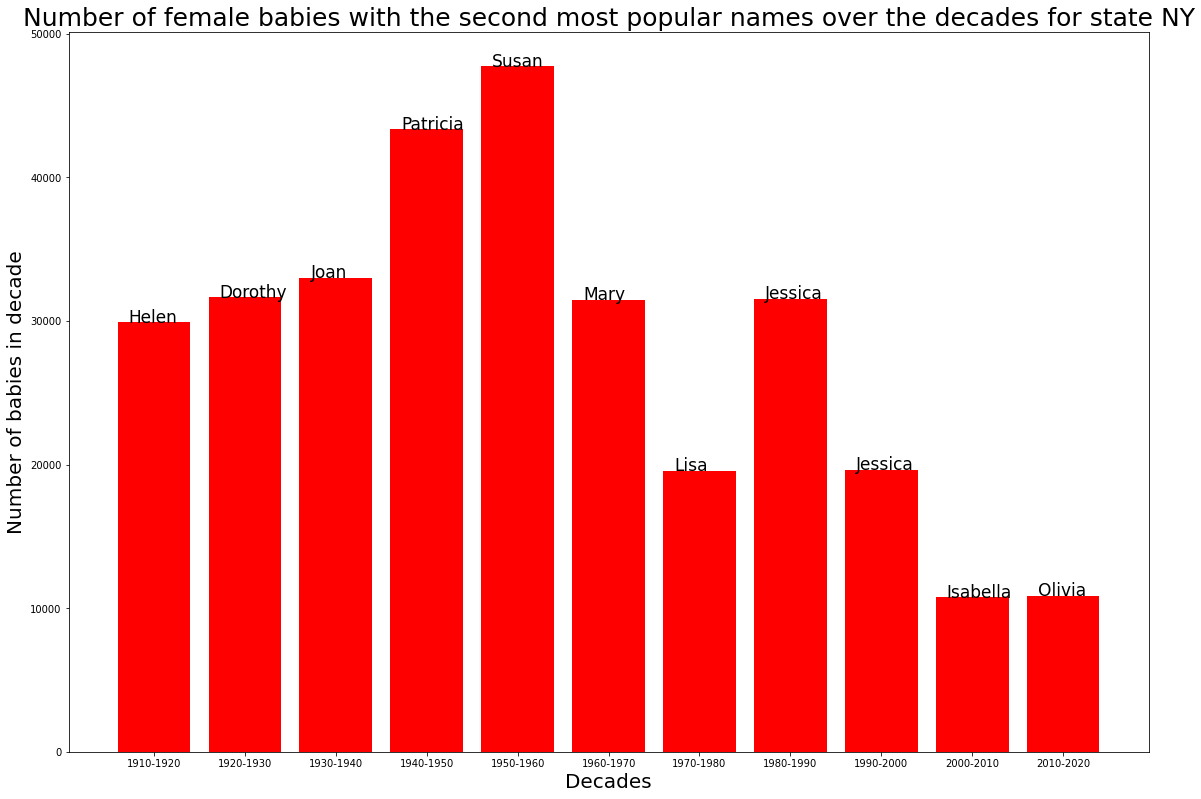

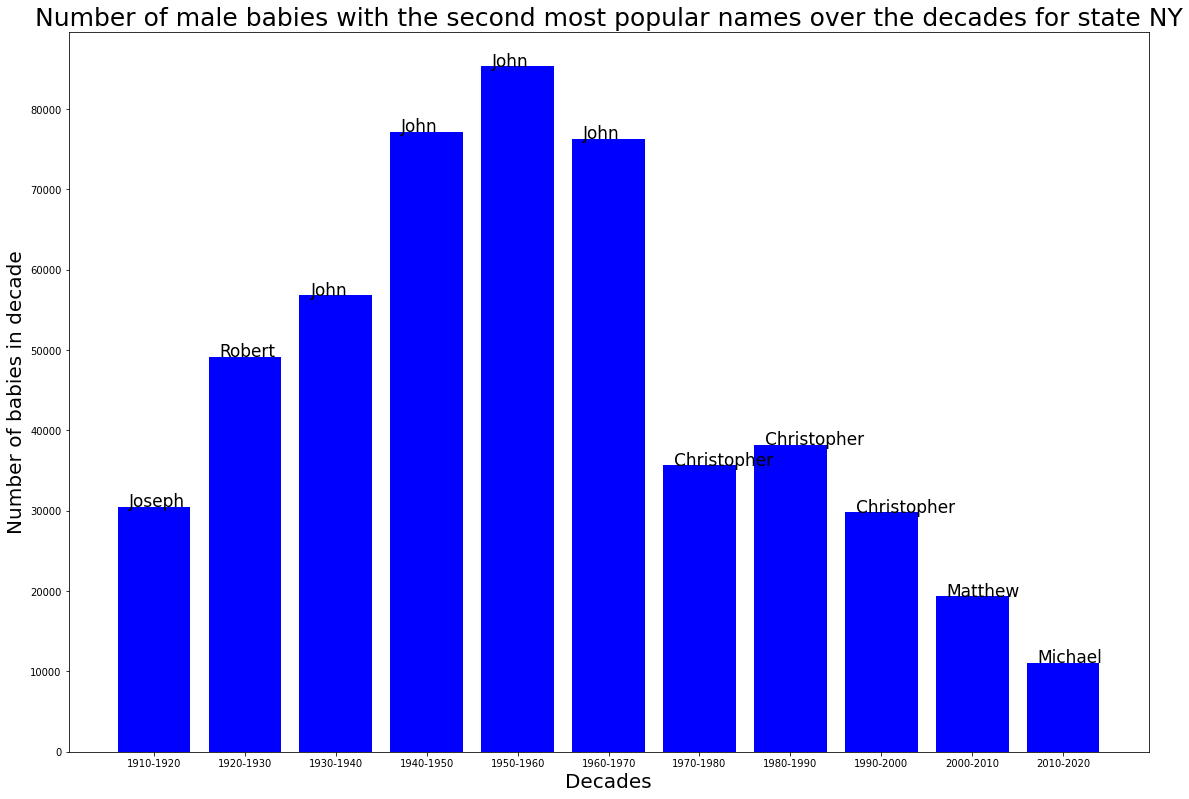

In [5]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def get_statistics_for_second_popular_name_per_decade(gender, state):
  c = conn.cursor() # creating a cursor object  
  decades_list = c.execute('SELECT (Year/10)*10 FROM Names WHERE Names.Gender = ? AND Names.State = ? GROUP BY Names.Year/10', [gender, state]).fetchall()
  decades_list = [i[0] for i in decades_list]
  decade_name_popularity_dic = {}
  for decade in decades_list:
    decade_name_popularity = c.execute('SELECT Name, SUM(Names.Number) FROM Names WHERE Names.Gender = ? AND Names.State = ? AND Names.Year>= ? AND Names.Year< ? GROUP BY Names.Name ORDER BY SUM(Names.Number) DESC', [gender, state,decade, decade+10]).fetchall()
    decade_name_popularity_dic[decade] = decade_name_popularity[1]   
  c.close() # close the cursor
  return decade_name_popularity_dic

def plot_gender_stats(decade_name_popularity_dic, state, gender):
  color = 'b'
  if gender=='female':
     color = 'r'
  fig = plt.figure(figsize=(15, 10))
  ax = fig.add_axes([0,0,1,1])
  decades = ["{}-{}".format(key, key+10) for key in decade_name_popularity_dic.keys()]
  names = [value[0] for key, value in decade_name_popularity_dic.items()]
  name_count = [value[1] for key, value in decade_name_popularity_dic.items()]
  ax.bar(decades,name_count, color=color)
  ax.set_ylabel('Number of babies in decade', fontsize=20)
  ax.set_xlabel('Decades', fontsize=20)
  ax.set_title('Number of {} babies with the second most popular names over the decades for state {}'.format(gender, state), fontsize=25)
  for index,  i in enumerate(ax.patches):
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x() + .12, i.get_height() - 3, \
            names[index], fontsize=17, color='black')
  plt.show()

def plot_stats_for_second_most_popular_name_over_decades_for_state(state):
  female_decade_name_popularity_dic = get_statistics_for_second_popular_name_per_decade('F', state)
  male_decade_name_popularity_dic = get_statistics_for_second_popular_name_per_decade('M', state)
  plot_gender_stats(female_decade_name_popularity_dic, state, 'female')
  plot_gender_stats(male_decade_name_popularity_dic, state, 'male')

plot_stats_for_second_most_popular_name_over_decades_for_state('NY')


# 2. Flavors of Cacao Dataset (15pt)

Using the [Flavors of Cacao](https://www.kaggle.com/rombikuboktaeder/choco-flavors) dataset, answer the following questions:

**Question 1:** Write a function that returns the number of bars manufactured where the bars' BroadBean Origin is a given country. Use the function to calculate the number of bars where BroadBean Origin is 'Fiji' (15pt)

In [6]:
!mkdir /root/.kaggle/
import json
import os

# Installing the Kaggle package
!pip install kaggle 

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

!mkdir ./datasets/choco_flavors
!kaggle datasets download rombikuboktaeder/choco-flavors -p ./datasets/
!unzip ./datasets/choco-flavors.zip -d ./datasets/choco-flavors/
!pip install pony

  0% 0.00/30.3k [00:00<?, ?B/s]
100% 30.3k/30.3k [00:00<00:00, 28.8MB/s]
Archive:  ./datasets/choco-flavors.zip
  inflating: ./datasets/choco-flavors/flavors_of_cacao.csv  
     |████████████████████████████████| 286kB 1.4MB/s 
  Created wheel for pony: filename=pony-0.7.13-cp36-none-any.whl size=345363 sha256=cce937ca513995d899ad357175cb713698543c81e4e43aaf8537e9edde8f8e5c
  Stored in directory: /root/.cache/pip/wheels/ca/c7/66/a9192d0ea4bcb17a25164284ec89b4563a6afbf7333947c0ea
Successfully built pony


In [0]:
from pony.orm import *
import pandas as pd
from decimal import *

# Creating a new database
db = Database()
db.bind(provider='sqlite', filename='/content/datasets/choco-flavors/choco-flavor.pony.db', create_db=True) # notice we can easily use other type of databases instead of SQLite

class Choco_flavor(db.Entity):
    id = PrimaryKey(int, auto=True)
    company = Optional(str)
    bean_originor = Optional(str)
    ref = Optional(int)
    review_date = Optional(int)
    cocoa_percent = Optional(Decimal)
    company_location = Optional(str)
    rating = Optional(Decimal)
    bean_type = Optional(str)
    broad_bean_origin = Optional(str)

set_sql_debug(True) # helps to see what SQL commands are running
db.generate_mapping(create_tables=True) # create tables

df = pd.read_csv('./datasets/choco-flavors/flavors_of_cacao.csv')

for idx, row in df.iterrows():
  broad_bean_origin_value = row['Broad Bean\nOrigin']
  bean_type_value = row['Bean\nType']  
  if broad_bean_origin_value != broad_bean_origin_value:
    broad_bean_origin_value = ""
  if bean_type_value != bean_type_value:
    bean_type_value = ""  
  Choco_flavor(company=row['Company\xa0\n(Maker-if known)'],
                bean_originor=row['Specific Bean Origin\nor Bar Name'],
                ref=row['REF'],
                review_date=row['Review\nDate'],
                cocoa_percent=Decimal(row['Cocoa\nPercent'].split('%')[0]),
                company_location=row['Company\nLocation'],
                rating=row['Rating'],
                bean_type=bean_type_value,
                broad_bean_origin=broad_bean_origin_value)
  commit()  


GET NEW CONNECTION
RELEASE CONNECTION
GET CONNECTION FROM THE LOCAL POOL
PRAGMA foreign_keys = false
BEGIN IMMEDIATE TRANSACTION
CREATE TABLE "Choco_flavor" (
  "id" INTEGER PRIMARY KEY AUTOINCREMENT,
  "company" TEXT NOT NULL,
  "bean_originor" TEXT NOT NULL,
  "ref" INTEGER,
  "review_date" INTEGER,
  "cocoa_percent" DECIMAL(12, 2),
  "company_location" TEXT NOT NULL,
  "rating" DECIMAL(12, 2),
  "bean_type" TEXT NOT NULL,
  "broad_bean_origin" TEXT NOT NULL
)

SELECT "Choco_flavor"."id", "Choco_flavor"."company", "Choco_flavor"."bean_originor", "Choco_flavor"."ref", "Choco_flavor"."review_date", "Choco_flavor"."cocoa_percent", "Choco_flavor"."company_location", "Choco_flavor"."rating", "Choco_flavor"."bean_type", "Choco_flavor"."broad_bean_origin"
FROM "Choco_flavor" "Choco_flavor"
WHERE 0 = 1

COMMIT
COMMIT
PRAGMA foreign_keys = true
CLOSE CONNECTION
RELEASE CONNECTION


In [0]:
def get_number_of_bars_for_country(country):
  return len([i.bean_originor for i in select(c for c in Choco_flavor if c.broad_bean_origin==country)])

print("number of bars manufactured for BroadBean Origin Fiji: {}".format(get_number_of_bars_for_country("Fiji")))

BEGIN IMMEDIATE TRANSACTION
SELECT "c"."id", "c"."company", "c"."bean_originor", "c"."ref", "c"."review_date", "c"."cocoa_percent", "c"."company_location", "c"."rating", "c"."bean_type", "c"."broad_bean_origin"
FROM "Choco_flavor" "c"
WHERE "c"."broad_bean_origin" = ?
['Fiji']

number of bars manufactured for BroadBean Origin Fiji: 8


**Question 2:** Write a function that returns the maximal and average cocoa percentage in a bar manufactured by a company in a specific country. Use the function to calculate the maximal and average cocoa percentage in bars manufactured by a Swiss company (15pt).

**Question 3:** Calculate the second most common bean type(s) and the most rare bean type(s) (15
pt)

**Question 4:** Calculate the number of reviews and the average rating in each year. Calculate the number of reviews and the average rating of each company in each year (15pt)

# 3. Kickstarter Projects Dataset (25pt)

Using the [Kickstarter Projects Dataset](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv), answer the following questions:

**Task 1 (for everyone):** Load the dataset to SQLite DB using [PonyORM](https://ponyorm.org) (10pt)

In [7]:
!mkdir ./datasets/kickstarter
!kaggle datasets download kemical/kickstarter-projects -p ./datasets/kickstarter
!unzip ./datasets/kickstarter/kickstarter-projects.zip -d ./datasets/kickstarter/

 79% 29.0M/36.8M [00:00<00:00, 39.2MB/s]
100% 36.8M/36.8M [00:00<00:00, 82.7MB/s]
Archive:  ./datasets/kickstarter/kickstarter-projects.zip
  inflating: ./datasets/kickstarter/ks-projects-201612.csv  
  inflating: ./datasets/kickstarter/ks-projects-201801.csv  


In [10]:
import datetime
from pony.orm import *
import pandas as pd
from decimal import *

# Creating a new database
db = Database()
db.bind(provider='sqlite', filename='/content/datasets/kickstarter/kickstarter_projects.pony.db', create_db=True) # notice we can easily use other type of databases instead of SQLite

class Kickstarter(db.Entity):
    id = PrimaryKey(int)
    name = Optional(str)
    category = Optional(str)
    main_category = Optional(str)
    currency = Optional(str)
    deadline = Optional(datetime.datetime)
    goal = Optional(Decimal)
    launched = Optional(datetime.datetime)
    pledged = Optional(Decimal)
    state = Optional(str)
    backers = Optional(int)
    country = Optional(str)
    usd_pledged = Optional(Decimal)
    usd_pledged_real = Optional(Decimal)
    usd_goal_real = Optional(Decimal)   


set_sql_debug(True) # helps to see what SQL commands are running
db.generate_mapping(create_tables=True) # create tables

df = pd.read_csv('./datasets/kickstarter/ks-projects-201801.csv')

for idx, row in df.iterrows():
  name_value=row['name']
  if name_value != name_value:
    name_value = ""  
  Kickstarter(id=row['ID'],
              backers=row['backers'],
              category=row['category'],
              country=row['country'],
              currency=row['currency'],
              deadline=row['deadline'],
              goal=row['goal'],
              launched=row['launched'],
              main_category=row['main_category'],
              name=name_value,
              pledged=row['pledged'],
              state=row['state'],
              usd_pledged=row['usd pledged'],
              usd_goal_real=row['usd_goal_real'],
              usd_pledged_real=row['usd_pledged_real']) 
  commit() 

Streaming output truncated to the last 5000 lines.
[1430848475, 'Hostile Shores Online (MMORPG / Site / Social Games)', 'Video Games', 'Games', 'USD', '2012-06-07 12:00:00.000000', '125000.00', '2012-05-01 21:55:17.000000', '240.00', 'failed', 11, 'US', '240.00', '240.00', '125000.00']

COMMIT
BEGIN IMMEDIATE TRANSACTION
INSERT INTO "Kickstarter" ("id", "name", "category", "main_category", "currency", "deadline", "goal", "launched", "pledged", "state", "backers", "country", "usd_pledged", "usd_pledged_real", "usd_goal_real") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
[14308493, 'Book: The Beginning of Complete Humanity', 'Nonfiction', 'Publishing', 'USD', '2015-01-19 12:00:00.000000', '15000.00', '2014-12-20 04:49:56.000000', '5.00', 'failed', 1, 'US', '5.00', '5.00', '15000.00']

COMMIT
BEGIN IMMEDIATE TRANSACTION
INSERT INTO "Kickstarter" ("id", "name", "category", "main_category", "currency", "deadline", "goal", "launched", "pledged", "state", "backers", "country", "usd_pl

### <span style="color:red"> Please answer only **one** of the following questions according to your ID number (use the formula **<YOUR_ID> mod 3 +1**) </span>

In [0]:
# which question to answer - put your ID number and run the code 
your_id  = "307848952"
q = int(your_id) % 3 + 1
print("You need to answer question number %s" % q)

You need to answer question number 2


**Question 1:** On average which project category received the highest number of backers? (15 pt)

**Question 2:** On average which project category received the highest pledged USD? (15 pt)

In [12]:
def get_category_with_average_highest_pledged_usd():
  results = [i for i in select((c.category, avg(c.usd_pledged)) for c in Kickstarter)]
  return max(results, key = lambda x: x[1])[0]

print("The project category that received the highest average pledged USD : {}".format(get_category_with_average_highest_pledged_usd()))

SELECT "c"."category", AVG("c"."usd_pledged")
FROM "Kickstarter" "c"
GROUP BY "c"."category"

The project category that received the highest average pledged USD : 3D Printing


**Question 3:** In which month occurred the highest number of projects? (15 pt)

## 4. Oscars Datasets (10pt)

Using the [Oscars Dataset](https://www.kaggle.com/theacademy/academy-awards), please answer only one of the following questions (you can chose):

**Question 1:** Who is the female actress with the most Oscar nominees? (10pt)

**Question 2:** Who is the male director with the most Oscar nominees? (10pt)

**Question 3:** Which top-10 movies received the highest number of Oscar nominees? (10pt)

**Question 4:** Write a function that receives an actor's name and returns the actor’s number of Oscar nominees. Use the function to calculate the number of times Leonardo DiCaprio was a nominee (10pt)

In [0]:
!mkdir ./datasets/academy-awards
!kaggle datasets download theacademy/academy-awards -p ./datasets/academy-awards
!unzip ./datasets/academy-awards/academy-awards.zip -d ./datasets/academy-awards/


def get_actor_number_of_oscar_nominees(actor_name):  
  c = conn.cursor() # creating a cursor object  
  nominee_list = c.execute('SELECT * FROM Academy_award WHERE Academy_award.Name = ?', [actor_name]).fetchall()
  c.close() # close the cursor
  return len(nominee_list)

df = pd.read_csv('./datasets/academy-awards/database.csv')
df.to_sql('Academy_award', conn, if_exists='append', index=False)
print("Number of times that the actor Leonardo DiCaprio was a nominee : {}".format(get_actor_number_of_oscar_nominees("Leonardo DiCaprio")))


Number of times that the actor Leonardo DiCaprio was a nominee : 5


## 5. Select a Dataset (15pt)

**Open Question:** Select an interesting dataset and use SQL to discover something interesting (15pt). **Bonus:** Use BigQuery (2pt)

In [0]:
!mkdir ./datasets/fake_and_real_news
!kaggle datasets download clmentbisaillon/fake-and-real-news-dataset -p ./datasets/fake_and_real_news
!unzip ./datasets/fake_and_real_news/fake-and-real-news-dataset.zip -d ./datasets/fake_and_real_news/
fake_df = pd.read_csv('./datasets/fake_and_real_news/Fake.csv')
fake_df.to_sql('Fake_news', conn, if_exists='append', index=False)

true_df = pd.read_csv('./datasets/fake_and_real_news/True.csv')
true_df.to_sql('True_news', conn, if_exists='append', index=False)

mkdir: cannot create directory ‘./datasets/fake_and_real_news’: File exists
 81% 33.0M/41.0M [00:00<00:00, 56.3MB/s]
100% 41.0M/41.0M [00:00<00:00, 69.6MB/s]


In [0]:
# trump started the election campain: June 16, 2015
# trump election day: November 8, 2016
def get_data_from_fake():  
  c = conn.cursor() # creating a cursor object  
  nominee_list = c.execute('SELECT * FROM Fake_news WHERE (Fake_news.title like "%Trump%" or Fake_news.text like "%Trump%") and Fake_news.date like "November%2016"').fetchall()
  c.close() # close the cursor
  return nominee_list

def get_data_from_true():  
  c = conn.cursor() # creating a cursor object  
  nominee_list = c.execute('SELECT * FROM True_news WHERE (True_news.title like "%Trump%" or True_news.text like "%Trump%") and True_news.date like "November%2016"').fetchall()
  c.close() # close the cursor
  return nominee_list


fake_news_in_election_time = get_data_from_fake()
true_news_in_election_time = get_data_from_true()
print("On November 8, 2016- the day Trump won the 2016 election:")
print("Number of fake news with Trump name (in title or in text): {}, Number of true news with Trump name (in title or in text): {}".format(len(fake_news_in_election_time),len(true_news_in_election_time)))



On November 8, 2016- the day Trump won the 2016 election:
Number of fake news with Trump name (in title or in text): 445, Number of true news with Trump name (in title or in text): 0
